### AARRR(Referral)

In [11]:
from konlpy.tag import Kkma

kkma = Kkma()

line_list = []
f = open("centrum_review.txt", encoding='utf-8')
for line in f:
    line = kkma.nouns(line)
    line_list.append(line)
f.close()

print("- 불러온 문서: {} ".format(f.name), len(line_list), ", 문장")

- 불러온 문서: centrum_review.txt  102 , 문장


In [12]:
print(len(line_list))

102


In [13]:
line_list[:]

[[],
 ['일반', '약국', '약', '신중', '선택', '겠죠', '부부', '기운', '감사'],
 ['배송', '물건', '정확'],
 ['2', '2번째구매', '번째', '구매', '만족'],
 ['먹습', 'ㄱ', 'ㄱㆍ', 'ㆍ'],
 ['적극', '적극추천', '추천', '배송'],
 [],
 ['부모님', '부모님선물', '선물', '온라인', '온라인최저가', '최저가', '흡족'],
 ['배송', '책', '비타민', '먹자', '생각', '기분', '탓', '피곤', '듯', '다음', '이용'],
 ['다', '구', '구매평', '매', '평', '유명', '증명', '제약', '제약회사', '회사', '제품', '수'],
 ['플라스틱', '포장', '과대', '과대포장', '상품', '상품자체', '자체', '투명'],
 ['부모님', '피곤', '피곤하다', '하다', '얼마안됬지', '효과'],
 ['건강',
  '구매',
  '센트',
  '센트룸',
  '룸',
  '포',
  '포맨',
  '맨',
  '군',
  '군대간',
  '대간',
  '아들',
  '가격',
  '용'],
 ['안전', '감사'],
 ['며칠', '복용', '아침', '피곤'],
 ['배송', '영양소', '비타민'],
 ['상품', '감사'],
 ['번째', '구매', '양도', '배송'],
 ['배송'],
 ['침', 'ㅎ', 'ㅎㅅㅎ', 'ㅅ'],
 ['만족'],
 [],
 ['바', '러', '러ㅣ', 'ㅣ'],
 [],
 ['거'],
 ['배송', '배송감사', '감사'],
 ['만족'],
 [],
 [],
 [],
 [],
 ['받앗어'],
 ['만족'],
 ['배송'],
 [],
 ['만족'],
 ['구매', '하', '후', '후후', '후히히히', '히', '호', '햐햐햐', '후호', '호'],
 ['비타민', '연', '하루', '하루섭취기준', '섭취', '기준', '영양소', '소변', '배출', '노란색'],
 

### 불용어 사전 만들기

In [14]:
# 불용어 사전 만들기

word_frequency = {} #단어별 등장수 체크용
noun_list = [] #워드리스트용

#불용어 리스트
stop_list = ['배송','만족','구매','번째', '감사']
line_number = 0

for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
#         print('일반/102' == word)
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:
#             print("split됨:", word)
            noun.append(word.split("/")[0])
#             print(noun)
            if word not in word_frequency.keys():
#                 print(word)
                word_frequency[word] = 1
#                 print(word_frequency)
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [15]:
# 단어별 출현 빈도 확인
word_count = []
for n, freq in word_frequency.items(): #.items()로 키와 밸류에 접근 가능
    word_count.append([n, freq]) #키와 밸류를 들고옴
    
# .sort()의 람다 파라미터 설정
# elem : elem[0] -> 첫번째 요소로 오름차순
# elem : elem[1] -> 두번쨰 요소로 오름차순
# reverse=False -> 오름차순, True = 내림차순
word_count.sort(key=lambda elem: elem[1], reverse=True)

for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

비타민	7
추천	5
건강	4
가격	4
적극	3
피곤	3
이용	3
제품	3
포장	3
효과	3


In [16]:
# 추출한 명사 리스트를 활용해 명사만으로 이루어진 문서 만들기
noun_doc = ' '.join(noun_list)
noun_doc = noun_doc.strip()

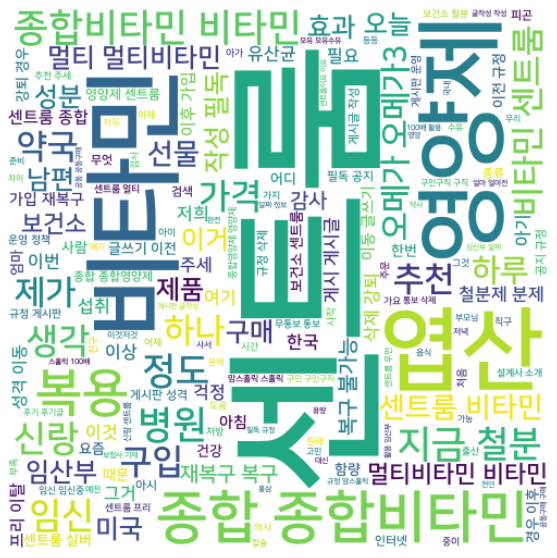

In [6]:
# 워드 클라우드 시각화
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# 폰트를 불러서 적용
font_path='NanumSquareB.otf'
background_color = 'white'
margin=3
min_font_size=7
max_font_size=150
width=500
height=500
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin,
              min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

# 그리기 시작
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

### 센트럼 텍스트 추가 작업

In [1]:
from konlpy.tag import Kkma

kkma = Kkma()

line_list = []
f = open("centrum2.txt", encoding='utf-8')
for line in f:
    line = kkma.nouns(line)
    line_list.append(line)
f.close()

print("- 불러온 문서: {} ".format(f.name), "총",len(line_list), "단어")

- 불러온 문서: centrum2.txt  총 2000 단어


In [2]:
word_frequency = {}
noun_list = []
#불용어 리스트를 여기에 추가합니다.
stop_list = ["배송", "만족", "카페", "카페규정", "확인", "주수", "센트"]
line_number = 0
for line in line_list[:]:
    line_number += 1
    print(str(line_number) + "/" + str(len(line_list)), end="\r")
    noun = []
    for word in line:
        if word.split("/")[0] not in stop_list and len(word.split("/")[0]) > 1:  
            noun.append(word.split("/")[0])
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
    noun_list.extend(noun)

In [3]:
#단어별 출현빈도를 출력합니다.
word_count = []
for n, freq in word_frequency.items():
    word_count.append([n, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)
for n, freq in word_count[:10]:
    print(n + "\t" + str(freq))

센트룸	1841
비타민	786
임신	344
영양제	342
종합	310
엽산	250
추천	246
철분	221
종합비타민	199
보건소	196


In [4]:
#추출한 명사 리스트를 활용해 명사만으로 이루어진 문서를 생성합니다.
noun_doc = ' '.join(noun_list)
noun_doc = noun_doc.strip()

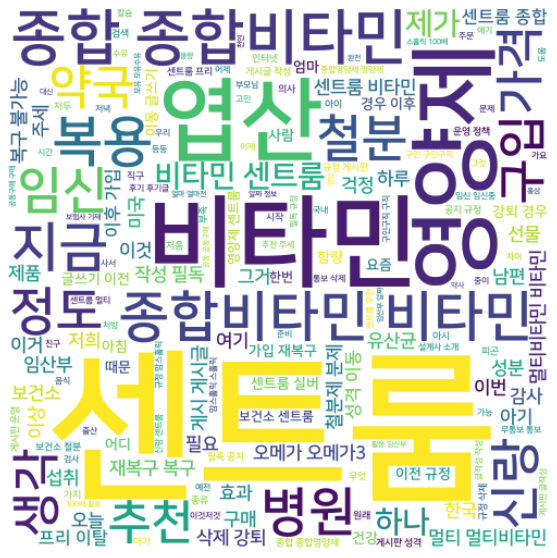

In [7]:
#워드클라우드 파라미터 설정
font_path="NanumSquareB.otf"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
import gensim
from gensim import corpora
import logging
logging.basicConfig(level=logging.DEBUG)

# 토픽과 키워드는 사용자가 임의로 바꿔가면서 가장 좋은 값이 나오는것을 찾는다.
topic = 5
keyword = 10
texts = []
resultList = []
stop_list = ["배송", "만족", "카페", "카페규정", "확인", "주수", "센트"]
for line in line_list:
    words = line
    if words != [""]:
        tokens = [word for word in words if (len(word.split("/")[0]) > 1 and word.split("/")[0] not in stop_list)]
        texts.append(tokens)
dictionary = corpora.Dictionary(texts)    
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)
for num in range(topic):
    resultList.append(ldamodel.show_topic(num, keyword))

ModuleNotFoundError: No module named 'gensim'

In [71]:
word_count

[['배송', 21],
 ['만족', 15],
 ['감사', 9],
 ['구매', 7],
 ['비타민', 7],
 ['추천', 5],
 ['건강', 4],
 ['가격', 4],
 ['번째', 3],
 ['적극', 3],
 ['피곤', 3],
 ['이용', 3],
 ['제품', 3],
 ['포장', 3],
 ['효과', 3],
 ['센트', 3],
 ['센트룸', 3],
 ['적극추천', 2],
 ['부모님', 2],
 ['선물', 2],
 ['기분', 2],
 ['다음', 2],
 ['상품', 2],
 ['아들', 2],
 ['복용', 2],
 ['영양소', 2],
 ['양도', 2],
 ['남편', 2],
 ['번창', 2],
 ['주문', 2],
 ['아빠', 2],
 ['도착', 2],
 ['일반', 1],
 ['약국', 1],
 ['신중', 1],
 ['선택', 1],
 ['겠죠', 1],
 ['부부', 1],
 ['기운', 1],
 ['물건', 1],
 ['정확', 1],
 ['2번째구매', 1],
 ['먹습', 1],
 ['ㄱㆍ', 1],
 ['부모님선물', 1],
 ['온라인', 1],
 ['온라인최저가', 1],
 ['최저가', 1],
 ['흡족', 1],
 ['먹자', 1],
 ['생각', 1],
 ['구매평', 1],
 ['유명', 1],
 ['증명', 1],
 ['제약', 1],
 ['제약회사', 1],
 ['회사', 1],
 ['플라스틱', 1],
 ['과대', 1],
 ['과대포장', 1],
 ['상품자체', 1],
 ['자체', 1],
 ['투명', 1],
 ['피곤하다', 1],
 ['하다', 1],
 ['얼마안됬지', 1],
 ['포맨', 1],
 ['군대간', 1],
 ['대간', 1],
 ['안전', 1],
 ['며칠', 1],
 ['아침', 1],
 ['ㅎㅅㅎ', 1],
 ['러ㅣ', 1],
 ['배송감사', 1],
 ['받앗어', 1],
 ['후후', 1],
 ['후히히히', 1],
 ['햐햐햐', 1],
 ['후호', 1]

In [76]:
word_count.sort(reverse=True)
word_count

[['흡족', 1],
 ['후히히히', 1],
 ['후후', 1],
 ['후호', 1],
 ['효과', 3],
 ['회사', 1],
 ['활력', 1],
 ['햐햐햐', 1],
 ['학창시절', 1],
 ['하루섭취기준', 1],
 ['하루', 1],
 ['하다', 1],
 ['피곤하다', 1],
 ['피곤', 3],
 ['플라스틱', 1],
 ['포장지', 1],
 ['포장', 3],
 ['포맨', 1],
 ['평소', 1],
 ['패패', 1],
 ['투명', 1],
 ['컨디션', 1],
 ['칼슘성분', 1],
 ['칼슘', 1],
 ['추천', 5],
 ['최저가', 1],
 ['처음', 1],
 ['증명', 1],
 ['주문', 2],
 ['제품', 3],
 ['제약회사', 1],
 ['제약', 1],
 ['정확', 1],
 ['적극추천', 2],
 ['적극', 3],
 ['자체', 1],
 ['일반', 1],
 ['이용', 3],
 ['유명', 1],
 ['용량', 1],
 ['온라인최저가', 1],
 ['온라인', 1],
 ['오랫동안', 1],
 ['영양소', 2],
 ['여여퍄패패', 1],
 ['얼마안됬지', 1],
 ['어제', 1],
 ['양도', 2],
 ['약국', 1],
 ['안전', 1],
 ['아침', 1],
 ['아빠', 2],
 ['아들', 2],
 ['신중', 1],
 ['신랑', 1],
 ['시절', 1],
 ['시작', 1],
 ['수고', 1],
 ['송도', 1],
 ['소변', 1],
 ['센트룸', 3],
 ['센트', 3],
 ['성분', 1],
 ['섭취', 1],
 ['선택', 1],
 ['선물', 2],
 ['생각', 1],
 ['상품자체', 1],
 ['상품', 2],
 ['사업', 1],
 ['사야겟어', 1],
 ['뾱뾱이없', 1],
 ['비타민', 7],
 ['비닐포장지', 1],
 ['비닐', 1],
 ['부부', 1],
 ['부모님선물', 1],
 ['부모님', 2],
 ['복용', 2],
 

In [78]:
word_count.sort(key=lambda x:x[0], reverse=True)
word_count

[['흡족', 1],
 ['후히히히', 1],
 ['후후', 1],
 ['후호', 1],
 ['효과', 3],
 ['회사', 1],
 ['활력', 1],
 ['햐햐햐', 1],
 ['학창시절', 1],
 ['하루섭취기준', 1],
 ['하루', 1],
 ['하다', 1],
 ['피곤하다', 1],
 ['피곤', 3],
 ['플라스틱', 1],
 ['포장지', 1],
 ['포장', 3],
 ['포맨', 1],
 ['평소', 1],
 ['패패', 1],
 ['투명', 1],
 ['컨디션', 1],
 ['칼슘성분', 1],
 ['칼슘', 1],
 ['추천', 5],
 ['최저가', 1],
 ['처음', 1],
 ['증명', 1],
 ['주문', 2],
 ['제품', 3],
 ['제약회사', 1],
 ['제약', 1],
 ['정확', 1],
 ['적극추천', 2],
 ['적극', 3],
 ['자체', 1],
 ['일반', 1],
 ['이용', 3],
 ['유명', 1],
 ['용량', 1],
 ['온라인최저가', 1],
 ['온라인', 1],
 ['오랫동안', 1],
 ['영양소', 2],
 ['여여퍄패패', 1],
 ['얼마안됬지', 1],
 ['어제', 1],
 ['양도', 2],
 ['약국', 1],
 ['안전', 1],
 ['아침', 1],
 ['아빠', 2],
 ['아들', 2],
 ['신중', 1],
 ['신랑', 1],
 ['시절', 1],
 ['시작', 1],
 ['수고', 1],
 ['송도', 1],
 ['소변', 1],
 ['센트룸', 3],
 ['센트', 3],
 ['성분', 1],
 ['섭취', 1],
 ['선택', 1],
 ['선물', 2],
 ['생각', 1],
 ['상품자체', 1],
 ['상품', 2],
 ['사업', 1],
 ['사야겟어', 1],
 ['뾱뾱이없', 1],
 ['비타민', 7],
 ['비닐포장지', 1],
 ['비닐', 1],
 ['부부', 1],
 ['부모님선물', 1],
 ['부모님', 2],
 ['복용', 2],
 

In [79]:
word_count.sort(key=lambda x:x[1], reverse=True)
word_count

[['배송', 21],
 ['만족', 15],
 ['감사', 9],
 ['비타민', 7],
 ['구매', 7],
 ['추천', 5],
 ['건강', 4],
 ['가격', 4],
 ['효과', 3],
 ['피곤', 3],
 ['포장', 3],
 ['제품', 3],
 ['적극', 3],
 ['이용', 3],
 ['센트룸', 3],
 ['센트', 3],
 ['번째', 3],
 ['주문', 2],
 ['적극추천', 2],
 ['영양소', 2],
 ['양도', 2],
 ['아빠', 2],
 ['아들', 2],
 ['선물', 2],
 ['상품', 2],
 ['부모님', 2],
 ['복용', 2],
 ['번창', 2],
 ['도착', 2],
 ['다음', 2],
 ['남편', 2],
 ['기분', 2],
 ['흡족', 1],
 ['후히히히', 1],
 ['후후', 1],
 ['후호', 1],
 ['회사', 1],
 ['활력', 1],
 ['햐햐햐', 1],
 ['학창시절', 1],
 ['하루섭취기준', 1],
 ['하루', 1],
 ['하다', 1],
 ['피곤하다', 1],
 ['플라스틱', 1],
 ['포장지', 1],
 ['포맨', 1],
 ['평소', 1],
 ['패패', 1],
 ['투명', 1],
 ['컨디션', 1],
 ['칼슘성분', 1],
 ['칼슘', 1],
 ['최저가', 1],
 ['처음', 1],
 ['증명', 1],
 ['제약회사', 1],
 ['제약', 1],
 ['정확', 1],
 ['자체', 1],
 ['일반', 1],
 ['유명', 1],
 ['용량', 1],
 ['온라인최저가', 1],
 ['온라인', 1],
 ['오랫동안', 1],
 ['여여퍄패패', 1],
 ['얼마안됬지', 1],
 ['어제', 1],
 ['약국', 1],
 ['안전', 1],
 ['아침', 1],
 ['신중', 1],
 ['신랑', 1],
 ['시절', 1],
 ['시작', 1],
 ['수고', 1],
 ['송도', 1],
 ['소변', 1],
 ['성분', 1],